In [2]:
# Market Basket Analysis using Apriori Algorithm for Simple Transaction Data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load Dataset
df = pd.read_excel('Online retail.xlsx')

In [3]:
# Preprocess: Convert comma-separated strings into list of items
transactions = df.iloc[:, 0].dropna().apply(lambda x: x.split(','))

In [4]:
# Transaction Encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [6]:
# Apply Apriori Algorithm with different thresholds
results = {}

thresholds = [
    {'min_support': 0.01, 'min_confidence': 0.3, 'min_lift': 1.0},
    {'min_support': 0.02, 'min_confidence': 0.4, 'min_lift': 1.1},
    {'min_support': 0.05, 'min_confidence': 0.5, 'min_lift': 1.2},
]

for idx, thresh in enumerate(thresholds):
    frequent_itemsets = apriori(df_encoded, min_support=thresh['min_support'], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=thresh['min_lift'])
    strong_rules = rules[(rules['confidence'] >= thresh['min_confidence']) & (rules['lift'] > thresh['min_lift'])]
    results[f"Scenario {idx+1}"] = strong_rules.sort_values(by='lift', ascending=False).head(10)

In [11]:
# Display Results
for scenario, rules_df in results.items():
    print(f"\n{scenario} - Top Association Rules:")
    print(rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='support', ascending=False))




Scenario 1 - Top Association Rules:
                            antecedents      consequents   support  \
229                       (ground beef)      (spaghetti)  0.039200   
287                         (olive oil)      (spaghetti)  0.022933   
385        (mineral water, ground beef)      (spaghetti)  0.017067   
216                     (herb & pepper)    (ground beef)  0.016000   
255                              (soup)           (milk)  0.015200   
368  (mineral water, frozen vegetables)           (milk)  0.011067   
379                 (milk, ground beef)  (mineral water)  0.011067   
397          (mineral water, olive oil)      (spaghetti)  0.010267   
292                          (red wine)      (spaghetti)  0.010267   
346                 (eggs, ground beef)  (mineral water)  0.010133   

     confidence      lift  
229    0.398915  2.290857  
287    0.348884  2.003547  
385    0.416938  2.394361  
216    0.323450  3.291555  
255    0.300792  2.320923  
368    0.309701  2.38967

In [ ]:
# #Interpretation

# 1.(ground beef) → (spaghetti)
# Support: 3.9% of transactions contained both items
# Confidence: ~39.9% of customers who bought ground beef also bought spaghetti
# Lift: 2.29 → These two items are purchased together 2.29 times more often than if they were independent.
# This is a strong association.

# 2.(herb & pepper) → (ground beef)
# Lift: 3.29 (very strong) → This suggests a tight purchasing link, possibly for cooking meals.
# (milk, ground beef) → (mineral water)
# Confidence: 50.3%, Lift: 2.11 → Customers who buy milk and ground beef often pair it with mineral water.

# Insight: Spaghetti, mineral water, milk, and ground beef appear in several rules — 
        #these items are part of frequently co-purchased combinations, possibly indicating common meal plans or dietary patterns.

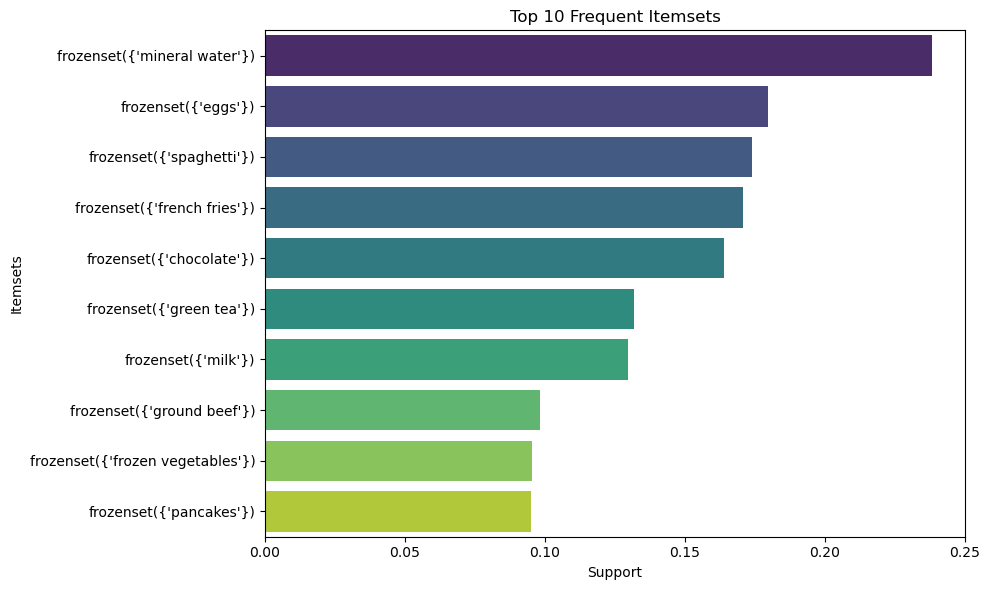

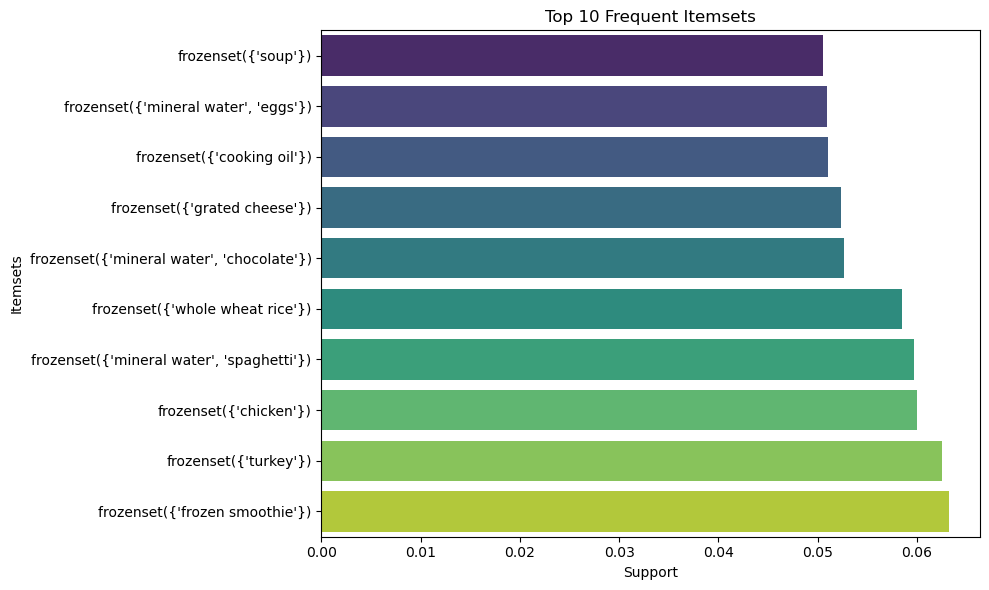

In [12]:
# Visualization: Top Frequent Itemsets
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y=top_items['itemsets'].astype(str), data=top_items, palette='viridis')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()

#Bottom Frequent Itemsets
top_items = frequent_itemsets.sort_values(by='support', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y=top_items['itemsets'].astype(str), data=top_items, palette='viridis')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()

In [13]:
#Bar Plot interpretation

#Mineral Water is most Purchased item in Itemsets
#Eggs is second Most purchased item
#Soup is the least purchased item


In [10]:
# Interview Q&A
# INTERVIEW QUESTIONS:

# 1. What is lift and why is it important in Association rules?
#    - Lift measures how much more often the antecedent and consequent occur together than expected if they were independent.
#    - Lift > 1 indicates a positive association; it helps uncover meaningful relationships beyond item popularity.

# 2. What is support and confidence?
#    - Support: Fraction of transactions containing an itemset. support(A ∩ B)
#    - Confidence: Likelihood that B is purchased when A is. confidence = support(A ∩ B) / support(A)

# 3. What are limitations of Association Rule Mining?
#    - Setting thresholds too high may miss patterns, too low creates noise.
#    - Computational cost increases with dataset size.
#    - Produces correlations, not causations.
